# Spine Model Calibrating VDCC


In [1]:
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True
import pickle

import PS_lib as lb
import PS_storage as st
from bootstrap import btset_cd, generateplots, ap


# Parameter definitions
# Data is stored here      
data = st.dataStorage() # some default parameters defined.
data.dt = 0.05
data.NMDA = False

# Definition of the model.
lb.h.dt = data.dt
NMDA = data.NMDA
model = lb.loadNeuron("Basic2.hoc",axon=False)

# Adding piece of dendritic branch with spine
model.addDend(name="DendE",locus="dendA1",L=4.0,D=1.5,ilocus=1)
model.addSpne(locus="DendE",ilocus=0.5,L=1.0,D=1.0,Lneck=1.0,Dneck=0.15)
# Temperature of the neuron
lb.h.celsius = model.temperature
model.addDend(name="DendN",locus=3,L=240.0,D=0.5,ilocus=1)
data.model = model.__dict__

model.soma.L = 20
model.dend[-1].L = 200
model.dend[-1].diam = 10
print(model.soma.L,model.soma.diam,model.soma(0.5).area(),model.dend[-1](0.5).area())

print("Topology:")
print(lb.h.topology())


	0 
	1 
	1 
	1 
	1 
20.0 29.78380012512207 1871.3713533814052 6283.185307179586
Topology:

|-|       soma(0-1)
   `|       dendA1c(0-1)
     `|       dendA1(0-1)
       `|       DendE(0-1)
         `|       DendN(0-1)
        `|       NSpne000(0-1)
          `|       Spne000(0-1)
   `|       dendB1(0-1)

1.0


In [2]:
#with open("data_Fullset/Fullset.pkl","rb") as f:
#    data = pickle.load(f)
    
dataf = {
"inh shaft": (-2.01288, 0.606754),
"SiS": {
"Dss": (248, 1.0),
"Vh": (-2.84134 , 0.943684),
"A1": (-0.2329858,0.41,1.0),
"Ah": (-0.9274113,1.32,0.66666666667),
"Rh":  (1.92772, 0.604723),
"Rn":(4.03436, 1.00208)
},
"DiS": {
"Dss": (248, 1.0),
"Vh": (-2.0554,0.742202),
"A1": (-0.2329858,0.41,1.0),
"Ah": (-0.9274113,1.32,0.66666666667),
"Rh": (1.59667,0.436302),  
"Rn": (3.89941,1.13159),
"A2": ( -2.54262,0.531551)
},
}

### Recording places

We set recording vectors in all dendritic compartments, spine included

In [3]:
nsp = 500
dis = btset_cd(cd='DiS',size=nsp)
sis = btset_cd(cd='SiS',size=nsp)
sps = btset_cd(cd='Sp',size=nsp)

#generateplots(dis,corplot=True)

Text(0.5, 0, 'iPSD shaft ($\\mu m^2$)')

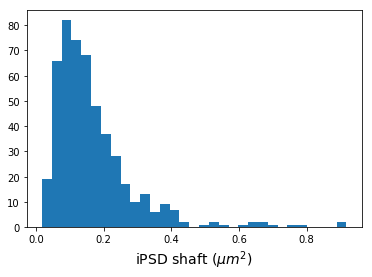

In [4]:
nsp = 500
p = dataf["inh shaft"]
iPSDsh = exp(randn(nsp)*p[1]+p[0])
iPSDsh = exp(randn(nsp)*p[1]+p[0])
figure()
h = hist(iPSDsh,31)
xlabel("iPSD shaft ($\mu m^2$)",fontsize=14)


In [5]:

rhGABAR = 500 # Receptors/um2
rhAMPAR = 1000 # Receptors/um2
rhNMDAR = 10 # Receptors/um2

gtrG = rhGABAR*30e-6*2/5.0
gtrA = rhAMPAR*11e-6*2/5.0
gtrN = rhNMDAR*30e-6/16.0

figureplot=False
if figureplot:
    fig, ax = subplots(nrows=1,ncols=4,figsize=(20,5))
    fig.suptitle("Number of Receptors",fontsize = 20)

    ax[0].hist(sis['A1']*rhAMPAR,31)
    ax[0].set_xlabel("#AMPAR in Sis")
    ax[1].hist(dis['A1']*rhAMPAR,31)
    ax[1].set_xlabel("#AMPAR in Dis")
    ax[2].hist(dis['A2']*rhGABAR,31)
    ax[2].set_xlabel("#GABAAR in Dis")
    ax[3].hist(iPSDsh*rhGABAR,31)
    ax[3].set_xlabel("#GABAAR in shaft")

    fig, ax = subplots(nrows=1,ncols=4,figsize=(20,5))
    fig.suptitle("Max Current",fontsize = 20)


    ax[0].hist(sis['A1']*gtrA/1e-6,31)
    ax[0].set_xlabel("I$_{max}$ (pA)")
    ax[1].hist(dis['A1']*gtrA/1e-6,31)
    ax[1].set_xlabel("I$_{max}$ (pA)")
    ax[2].hist(dis['A2']*gtrG/1e-6,31)
    ax[2].set_xlabel("I$_{max}$ (pA)")
    ax[3].hist(iPSDsh*gtrG/1e-6,31)
    ax[3].set_xlabel("I$_{max}$ (pA)")
    #savefig("D_maxI.png",bbox_inches='tight',pad_inches = 0)


In [6]:

#def fx(Dmax,V):
#    xx = Dmax
#    yy = sqrt(4*V/Dmax/pi)
#    return(array([xx,yy]))
##                 L  D
#
#spn = dis
#spn["D"] = zeros(nsp)
#spn["L"] = zeros(nsp)
#spn["AhA0"] = zeros(nsp)

#for i in arange(nsp):
#    Ah = spn["Ah"][i]
#    Vh = spn["Vh"][i]
#    Dmax = spn["maxDhead"][i]/1e3
#
#    L,D = fx(Dmax,Vh)
#    spn["D"][i] = D
#    spn["L"][i] = L
#    spn['AhA0'][i] = Ah/(D*pi*L)
#    #
#
#spn = sis
#spn["D"] = zeros(nsp)
#spn["L"] = zeros(nsp)
#spn["AhA0"] = zeros(nsp)

#for i in arange(nsp):
#    Ah = spn["Ah"][i]
#    Vh = spn["Vh"][i]    
#    Dmax = spn["maxDhead"][i]/1e3#

#    L,D = fx(Dmax,Vh)
#    spn["D"][i] = D
#    spn["L"][i] = L
#    spn['AhA0'][i] = Ah/(D*pi*L)


In [7]:
for dend in model.dend:
    print(dend.L,dend.diam)

1.0 1.5
200.24984394500785 1.5000000000000002
50.15974481593781 1.5
4.0 1.5
200.0 10.0


In [8]:
sp = model.spne[0]
print(sp(0.5).area(),sp(0.5).volume(),sp.diam*sp.L*pi,sp.diam**2*sp.L*pi/4.0)

sp.L = dis["L"][0]
sp.diam = dis["D"][0]
print("Area Volume Ah Vh")
print(sp(0.5).area(),sp(0.5).volume(),dis["Ah"][0]/dis["AhA0"][0],dis["Vh"][0])


3.141592653589793 0.7853981633974483 3.141592653589793 0.7853981633974483
Area Volume Ah Vh
1.5953127406116512 0.2742763867966138 1.5953127406116512 0.2742763867966138


### Excitatory synapse 

We need to define the arrival time and dynamics. These parameters may be modified later

In [9]:
model.AMPAlist = []
model.ncAMPAlist = []

AMPA = lb.h.Exp2Syn(1,sec = model.spne[0])
tau1  = 0.5
tau2 = 3.0
AMPA.tau1 = tau1
AMPA.tau2 = tau2

nampa = 50
gmax = 15*nampa/1e6
stimE=lb.h.NetStim();stimE.number = 1; 
NC = lb.h.NetCon(stimE,AMPA,0,0,gmax)

model.AMPAlist.append(AMPA)
model.ncAMPAlist.append(NC)
NC.delay = 10

# NMDA part
nnmda = 2
gmaxN = 50*nnmda/1e6
lb.add_NMDAsyns(model, locs=[[0,0.5]], gmax=gmaxN,tau2=20.0)  
NMDA = model.NMDAlist[0]
NCN = model.ncNMDAlist[0]
stimN=lb.h.NetStim();stimN.number = 1;
NCN = lb.h.NetCon(stimN,NMDA,0,0,gmaxN)
model.ncNMDAlist[0] = NCN
NMDA.tau1 = 2.0
NMDA.tau2 = 30.0


### Inhibitory synapse

In [10]:
nGABA = 35
gmaxG = nGABA*30e-6
GABA, NCG = lb.add_GABAsyns(model, locs=[[0,1]], spne=True, gmax=gmaxG,tau1=1.5,tau2=15.0)  
#GABA = model.GABAlist[0]
#NCG = model.ncGABAlist[0]
#stimG=lb.h.NetStim();stimG.number = 1;
#NCG = lb.h.NetCon(stimG,GABA,0,0,gmaxG)
#model.ncGABAlist[0] = NCG

In [11]:
lb.init_active(model, axon=False, soma=False, dend=False, dendNa=False,
                dendCa=False,spne=True)

In [12]:
sp = model.spne 

In [13]:
trec, vrec = lb.h.Vector(), lb.h.Vector()
gRec, iRec,  vspneRec = [], [], []
gNMDA_rec, iNMDA_rec = [], []
trec.record(lb.h._ref_t)
vrec.record(model.soma(0.5)._ref_v)


#n=0
vDendRec = []
caDendRec = []
#For all dendrites
for dend in model.dend:
    #Adding vectors for Voltage, and Calcium
    vDendRec.append(lb.h.Vector())
    caDendRec.append(lb.h.Vector())
    # Placing recording at mid-point in the dendritic branch
    vDendRec[-1].record(dend(0.5)._ref_v)
    # NO CALCIUM!?!?!
#Probably better to organize them in a dictionary        
vDendRec[1].record(model.dend[1](1.0)._ref_v)

# Spine voltage recording stuff
vspneRec.append(lb.h.Vector())
vspneRec.append(lb.h.Vector())
sp = model.spne[0]
vspneRec[0].record(sp(0.5)._ref_v)
sp = model.neck[0]
vspneRec[1].record(sp(0.5)._ref_v)

# Calcim

caDendRec = []
sp = model.spne[0]
caDendRec.append(lb.h.Vector())
caDendRec.append(lb.h.Vector())
caDendRec.append(lb.h.Vector())
caDendRec[0].record(sp(0.5)._ref_ica) 
caDendRec[1].record(model.NMDAlist[0]._ref_i)
caDendRec[2].record(sp(1.0)._ref_cai) 


Vector[16]

In [14]:
vDendEL = []
dend = model.dend[1]
for i in range(10):
    vDendEL.append(lb.h.Vector())
    vDendEL[-1].record(dend((i+1.0)/10.0)._ref_v)

In [15]:
vDendEL2 = []
dend = model.dend[-1]
for i in range(10):
    vDendEL2.append(lb.h.Vector())
    vDendEL2[-1].record(dend((i+1.0)/10.0)._ref_v)

In [16]:
model.dend

[dendA1c, dendA1, dendB1, DendE, DendN]

In [17]:
iRec.append(lb.h.Vector())
iRec.append(lb.h.Vector())
currentAMPA = iRec[0]
currentGABA = iRec[1]

In [18]:
currentAMPA.record(AMPA._ref_i)
currentGABA.record(GABA._ref_i)

Vector[38]

In [19]:
dendsizeL0 = 10
dendsizeL = max(max(max(dis['Dss'])+10,max(sis['Dss'])+10),178)
neck = model.neck[0]
Rneck = neck.L*1e-6/(neck.diam*1e-6/2.0)**2/pi*neck.Ra/100
dend = model.dend[0]
dend.L = dendsizeL0
dend.diam = 1.0
print(dend.L,dend.diam)
Rdend = dend.L*1e-6/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
Rdendf = Rdend
dend = model.dend[1]
dendc = model.dend[1]
dendc.L = dendsizeL
dend.diam = 0.5
print(dend.L,dend.diam,Rdend/1e6)
Rdend +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
dend = model.dend[-2]
dend.diam = 0.5
dendsh = model.dend[-2]
dend.L = 1
print(dend.L,dend.diam,Rdend/1e6)
Rdend +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
Rdendf +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
print("The resistance of neck and the dendritic impedance are %.2f and %2.f MΩ (resp.)" %(Rneck/1e6,Rdend/1e6))

10.0 1.0
178.0 0.5 31.830988618379067
1.0 0.5 1165.014183432674
The resistance of neck and the dendritic impedance are 141.47 and 1171 MΩ (resp.)


In [20]:
#model.soma.diam = model.soma.L
dendN = model.dend[-1]
dendN.L = 1

In [21]:
dendsh.diam = 0.5
dendc.diam = 0.5
dendN.diam = 0.5        

In [22]:
rhosp = 1.3
dendareaperL = rhosp*mean(sps['Ah'])+(pi*0.5)
factor = dendareaperL/(pi*0.5)
print(factor)
dendN.cm = 3.5
dendc.cm = 3.5

3.750667318066659


In [23]:
dendc.nseg = int(dendc.L//10)+1
dendN.nseg = int(dendN.L//10)+1

dendc.nseg = 10
dendN.nseg = 10
print(dendc.nseg,dendN.nseg)

10 10


## Plots

xkcd is to give it non serious appearance

In [24]:
gtrG = rhGABAR*30e-6*2/5.0
gtrA = rhAMPAR*11e-6*3/5.0
gtrN = rhNMDAR*30e-6*1.0/16.0/4.0/1.27

In [25]:
diam0 = 0.15
Rneck0 = Rneck/1e6
Cm0 = model.CM
print(Rneck0)

141.4710605261292


In [26]:
Rneck = neck.Ra*neck.L/(neck.diam)**2*0.04/pi
print(Rneck)

141.4710605261292


In [27]:
ta = linspace(0,40,10000)
t =  lb.h.Vector(ta)
y =  lb.h.Vector(ap(t))

In [28]:
def simulateSetwAP(model,spn,y,t,VDCC = array([0.,0,0]),tAP = 100,tG = 500,ton = 50,toffset = 50,t_stop = 250, EL = -65,btsr = None):
    if btsr is None:
        btsr = ones(9)==0
    model.E_PAS = EL
    model.soma.e_pas = model.E_PAS
    for dendp in model.dend:
        dendp.e_pas = model.E_PAS
    for sp in model.spne:
        sp.e_pas = model.E_PAS

    dendsh = model.dend[-2]
    dendc = model.dend[1]
    dendN = model.dend[-1]
    neck = model.neck[0]
    sp = model.spne[0]
    dshL = dendsh.L
    dendsizeL = dendsh.L+dendc.L+dendN.L
    data = column_stack((spn["A1"],spn["A1"],spn["A2"],spn["Rneck"],spn["Dss"],spn["L"],spn["D"],spn["Ln"],spn["AhA0"]))
    if isnan(data).sum()>0:
        raise "There are nans do something about it"
    for i in range(9):
        if ~btsr[i]:
            data[:,i] = data[:,i].mean()
            
    y.play_remove()
    y.play(dendsh(0.5)._ref_v,t,True)
    y.play(dendc(0.5)._ref_v,t,True)
    y.play(model.soma(0.5)._ref_v,t,True)
    
    mes = zeros((nsp,9))
    me2 = zeros((nsp,11))
    me3 = zeros((nsp,10))

    iad = 2
    vavg = zeros((int(t_stop/lb.h.dt)+iad,7))
    vtracs = zeros((int(t_stop/lb.h.dt)+iad,500))
    Ctracs = zeros((int(t_stop/lb.h.dt)+iad,500))
    vtracsD = zeros((int(t_stop/lb.h.dt)+iad,500))
    vtracsS = zeros((int(t_stop/lb.h.dt)+iad,500))
    for i in arange(nsp):
        NC.weight[0]  = data[i,0] *gtrA*0#/2
        NCN.weight[0] = data[i,1] *gtrN*0#*0#*0
        NCG.weight[0] = data[i,2] *gtrG*0#*0
        
        neck.L = data[i,7]  
        Rneck0 = neck.Ra*neck.L/(diam0)**2*0.04/pi
        #print(Rneck0,data[i,3])
        neck.diam = diam0*sqrt(Rneck0/data[i,3])
        
        posD = data[i,4]
        
        dendc.L = posD-dshL/2
        dendN.L = dendsizeL-posD-dshL/2

        
        # A = pi*D**2
        sp.L = data[i,5]
        sp.diam = data[i,6]
        sp.cm = data[i,8]
        spvol = sp(0.5).volume()
        spineArea =  sp(0.5).area()#sp.L*sp.diam+1.8*sp.diam**2/4 # um^2
        
        CaTcond = 1e-3# pS
        sp.pbar_caL13PS = VDCC[0]*CaTcond#/spineArea
        sp.pbar_caLPS = VDCC[1]*CaTcond#/spineArea
        sp.pbar_canPS = VDCC[2]*CaTcond#/spineArea
        sp.pcaqbar_caqPS = VDCC[3]*CaTcond#/spineArea
        
        NC.delay = toffset+ton-50
        NCN.delay = toffset+ton-50
        NCG.delay = toffset+tG#toffset+tG#-50

        for il in range(10):
            f = 1-7.5*il/dendc.L
            #f = 0.5
            if f>=0:
                vDendEL[il].record(dendc(f)._ref_v)
            else:
                vDendEL[il].record(dendc(0.0)._ref_v)
        
        for il in range(10):
            f = 7.5*il/dendc.L
            #f = 0.5
            if f<=1:
                vDendEL2[il].record(dendN(f)._ref_v)
            else:
                vDendEL2[il].record(dendN(1.0)._ref_v)
                
        ta = concatenate(([0],linspace(tAP-10,tAP+40,10000),[t_stop]))

        y = y.from_python(ap(ta,tAP))
        t = t.from_python(ta)
        
        lb.h.finitialize(model.E_PAS)
        
        

                    
        #print(data[i,:])
        lb.neuron.run(t_stop)
        
        #plot(trec,vspneRec[0])    
        
        current = abs((array(vDendRec[1])-array(vrec[0]))/Rdend)
        
        vtracs[:,i] = array(vspneRec[0]) 
        vtracsD[:,i] = array(vDendRec[1])
        #vtracsD[:,i] = array(vDendEL[0])
        vtracsS[:,i] = array(vrec) 

        vavg[:,0] += array(vspneRec[0]) 
        vavg[:,1] += array(vspneRec[0])**2
        vavg[:,2] += array(vDendRec[1]) 
        vavg[:,3] += array(vDendRec[1])**2
        vavg[:,4] += array(vrec) 
        vavg[:,5] += array(vrec)**2
        vavg[:,6] += 1
            
        cat = array(caDendRec[-1])/1e-3
        Ctracs[:,i] = cat-cat[0] 
        aG = abs(array(currentGABA)).argmax()
        aA = abs(array(currentAMPA)).argmax()
        
        mes[i,:] = [data[i,3],max(vspneRec[0])-EL,max(vDendRec[3])-EL,max(vrec)-EL,max(cat)-cat[0],array(currentGABA)[aG],array(currentAMPA)[aA],spvol,max(current)]
        me2[i,0] = max(vDendRec[3])
        me2[i,1:] = [max(vD) for vD in vDendEL]
        me3[i,:] = [max(vD) for vD in vDendEL2]

        #plot(trec,array(caDendRec[-1])/1e-3)
        #ylabel("[Ca] (uM)")
        #figure()
        #plot(trec,vspneRec[0])
        #break
        
    vavg[:,:5] = vavg[:,:5]/vavg[0,6]
    vavg[:,1] = sqrt(vavg[:,1]-vavg[:,0]**2)#/sqrt(vavg[0,6])
    vavg[:,3] = sqrt(vavg[:,3]-vavg[:,2]**2)#/sqrt(vavg[0,6])
    vavg[:,5] = sqrt(vavg[:,5]-vavg[:,4]**2)#/sqrt(vavg[0,6])
    y.play_remove()
    
    return(vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3,array(trec))

In [29]:
output = simulateSetwAP(model,dis,y,t, \
                        VDCC = array([1e-1,1,1,1]),tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)

vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output

<Figure size 432x288 with 0 Axes>

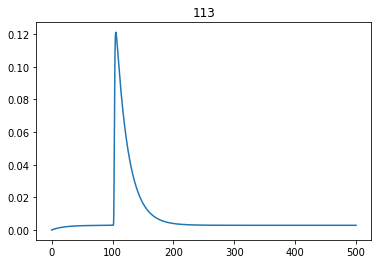

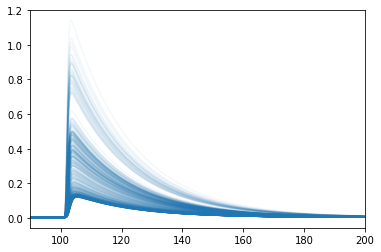

<Figure size 432x288 with 0 Axes>

In [30]:
i = randint(500)

plot(arange(Ctracs0.shape[0])*lb.h.dt,Ctracs0[:,i])
title(i)

figure()
ts = arange(Ctracs0.shape[0])*lb.h.dt
for i in range(500):
    plot(ts,Ctracs0[:,i],'C0',alpha=0.05)
xlim(90,200)
figure()


In [31]:
from scipy.integrate import simps

In [32]:
def itertis(t1,t2,A1,A2):
    te = t1*t2/(t1-t2)
    numtt = (t2/t1)**(te/t1)-(t2/t1)**(te/t2)
    t1 = t2 + numtt*A1
    t2 = A2/log(t1/t2)*(t1-t2)/t1
    return(t1,t2)
def gettimes(As,t1 = 10,t2 = 1, n = 1000,tol = 1e-9):
    A1, A2 = As
    t1a, t2a = t1, t2
    for i in range(n):
        t1,t2 = itertis(t1,t2,A1,A2)
    
        if (t1-t1a)**2/t1**2+(t2-t2a)**2/t2**2<tol:
            #print(i)
            break
        t1a, t2a = t1, t2
        #print(t1,t2)
    if i>=n: 
        print('No convergence?')
        
    return(t1,t2)

def transientTimes(St, tlim = None, ton = 100):
    ts = arange(St.shape[0])*lb.h.dt
    if tlim is None:
        tlim = (min(ts),max(ts))
    sel = (ts>tlim[0])*(ts<tlim[1])
    ct = St[sel,:]-St[-1,:]
    ts = ts[sel]
    sel0 = arange(len(ts))[ts==ton]
    intv = array(list(map(lambda x: simps(x,ts),ct.transpose())))
    sel = ct.argmax(axis=0)
    ampv = ct.max(axis=0)
    tt = intv/ampv
    trise = ts[sel]-ts[sel0]
    times = array(list(map(gettimes,column_stack((tt,trise)))))
    return(times)

In [34]:
ts = arange(Ctracs0.shape[0])*lb.h.dt
sel = (ts>90)*(ts<200)
ct = Ctracs0[sel,:]-Ctracs0[-1,:]
ts = ts[sel]
sel0 = arange(len(ts))[ts==100]
intv = array(list(map(lambda x: simps(x,ts),ct.transpose())))
sel = ct.argmax(axis=0)
ampv = ct.max(axis=0)
tt = intv/ampv
trise = ts[sel]-ts[sel0]
times = array(list(map(gettimes,column_stack((tt,trise)))))
times2 = transientTimes(Ctracs0,tlim= (90,200),ton=100)

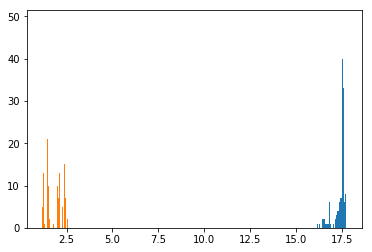

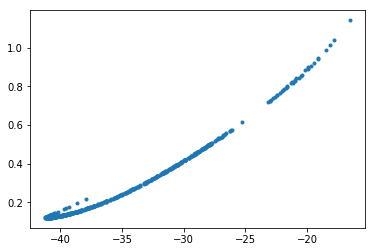

In [37]:
h = hist(times[:,0],100)
h = hist(times2[:,1],100)
figure()
plot(vtracs0.max(axis=0),Ctracs0.max(axis=0),'.')

<Figure size 432x288 with 0 Axes>

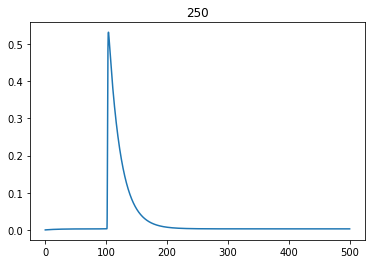

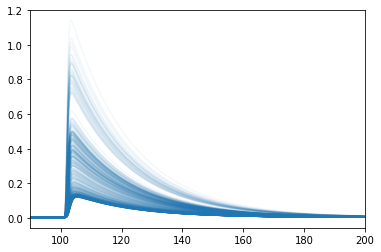

<Figure size 432x288 with 0 Axes>

In [38]:
#output = simulateSetwAP(model,dis,y,t, \
#                        VDCC = array([1e-1,0,0,0]),tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)

#vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
i = randint(500)

plot(arange(Ctracs0.shape[0])*lb.h.dt,Ctracs0[:,i])
title(i)

figure()
ts = arange(Ctracs0.shape[0])*lb.h.dt
for i in range(500):
    plot(ts,Ctracs0[:,i],'C0',alpha=0.05)
xlim(90,200)
figure()


In [39]:
spineArea =  sp(0.5).area()#sp.L*sp.diam+1.8*sp.diam**2/4 # um^2
spineArea

0.2811137408617801

In [40]:
npar = 21
par0 = 10**linspace(-2,2,21)
phdiagLin = zeros((len(par0)*4,9))
for i,p in enumerate(par0):
    vcomp = array([p,0,0,0])
    output = simulateSetwAP(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLin[i,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    vcomp = array([0,p,0,0])
    output = simulateSetwAP(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLin[i+npar,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    vcomp = array([0,0,p,0])
    output = simulateSetwAP(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLin[i+npar*2,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    vcomp = array([0,0,0,p])
    output = simulateSetwAP(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLin[i+npar*3,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    print(i)

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in sqrt
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:137: RuntimeWarning: invalid value encountered in sqrt


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0, 0.5, 'Time Ca')

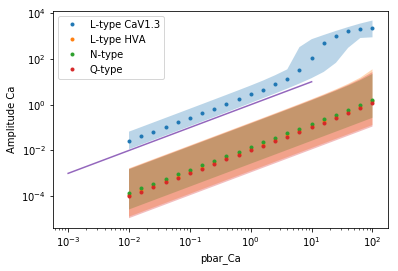

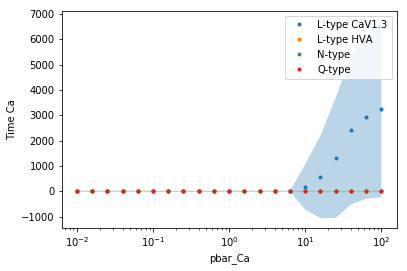

In [44]:
xt = phdiagLin*1.0
calabels = ['L-type CaV1.3','L-type HVA','N-type','Q-type']
for i in range(4):
    plot(xt[xt[:,i]>0,i],xt[xt[:,i]>0,4],'.',label=calabels[i])
    fill_between(xt[xt[:,i]>0,i],xt[xt[:,i]>0,5],xt[xt[:,i]>0,6],alpha=0.3)
plot(10**linspace(-3,1),10**linspace(-3,1))

legend()
xscale('log')
yscale('log')
xlabel("pbar_Ca")
ylabel('Amplitude Ca')
figure()
calabels = ['L-type CaV1.3','L-type HVA','N-type','Q-type']
for i in range(4):
    plot(xt[xt[:,i]>0,i],xt[xt[:,i]>0,7],'.',label=calabels[i])
    fill_between(xt[xt[:,i]>0,i],xt[xt[:,i]>0,7]-xt[xt[:,i]>0,8],xt[xt[:,i]>0,7]+xt[xt[:,i]>0,8],alpha=0.3)


legend()
xscale('log')

xlabel("pbar_Ca")
ylabel('Time Ca')

In [45]:
def simulateSet(model,spn,y,t,VDCC = array([0.,0,0,0]),tAP = 100,tG = 500,ton = 50,toffset = 50,t_stop = 250, EL = -65,btsr = None):
    if btsr is None:
        btsr = ones(9)==0
    model.E_PAS = EL
    model.soma.e_pas = model.E_PAS
    for dendp in model.dend:
        dendp.e_pas = model.E_PAS
    for sp in model.spne:
        sp.e_pas = model.E_PAS

    dendsh = model.dend[-2]
    dendc = model.dend[1]
    dendN = model.dend[-1]
    neck = model.neck[0]
    sp = model.spne[0]
    dshL = dendsh.L
    dendsizeL = dendsh.L+dendc.L+dendN.L
    data = column_stack((spn["A1"],spn["A1"],spn["A2"],spn["Rneck"],spn["Dss"],spn["L"],spn["D"],spn["Ln"],spn["AhA0"]))
    if isnan(data).sum()>0:
        raise "There are nans do something about it"
    for i in range(9):
        if ~btsr[i]:
            data[:,i] = data[:,i].mean()
            

    mes = zeros((nsp,9))
    me2 = zeros((nsp,11))
    me3 = zeros((nsp,10))

    iad = 2
    vavg = zeros((int(t_stop/lb.h.dt)+iad,7))
    vtracs = zeros((int(t_stop/lb.h.dt)+iad,500))
    Ctracs = zeros((int(t_stop/lb.h.dt)+iad,500))
    vtracsD = zeros((int(t_stop/lb.h.dt)+iad,500))
    vtracsS = zeros((int(t_stop/lb.h.dt)+iad,500))
    for i in arange(nsp):
        NC.weight[0]  = data[i,0] *gtrA#/2
        NCN.weight[0] = data[i,1] *gtrN*0#*0#*0
        NCG.weight[0] = data[i,2] *gtrG*0#*0
        
        neck.L = data[i,7]  
        Rneck0 = neck.Ra*neck.L/(diam0)**2*0.04/pi
        #print(Rneck0,data[i,3])
        neck.diam = diam0*sqrt(Rneck0/data[i,3])
        
        posD = data[i,4]
        
        dendc.L = posD-dshL/2
        dendN.L = dendsizeL-posD-dshL/2

        
        # A = pi*D**2
        sp.L = data[i,5]
        sp.diam = data[i,6]
        sp.cm = data[i,8]
        spvol = sp(0.5).volume()
        spineArea =  sp(0.5).area()#sp.L*sp.diam+1.8*sp.diam**2/4 # um^2
        
        CaTcond = 1e-3# pS
        sp.pbar_caL13PS = VDCC[0]*CaTcond#/spineArea
        sp.pbar_caLPS = VDCC[1]*CaTcond#/spineArea
        sp.pbar_canPS = VDCC[2]*CaTcond#/spineArea
        sp.pcaqbar_caqPS = VDCC[3]*CaTcond#/spineArea
        
        NC.delay = toffset+ton-50
        NCN.delay = toffset+ton-50
        NCG.delay = toffset+tG#toffset+tG#-50

        for il in range(10):
            f = 1-7.5*il/dendc.L
            #f = 0.5
            if f>=0:
                vDendEL[il].record(dendc(f)._ref_v)
            else:
                vDendEL[il].record(dendc(0.0)._ref_v)
        
        for il in range(10):
            f = 7.5*il/dendc.L
            #f = 0.5
            if f<=1:
                vDendEL2[il].record(dendN(f)._ref_v)
            else:
                vDendEL2[il].record(dendN(1.0)._ref_v)
                
        ta = concatenate(([0],linspace(tAP-10,tAP+40,10000),[t_stop]))

        
        lb.h.finitialize(model.E_PAS)
        
        

                    
        #print(data[i,:])
        lb.neuron.run(t_stop)
        
        #plot(trec,vspneRec[0])    
        
        current = abs((array(vDendRec[1])-array(vrec[0]))/Rdend)
        
        vtracs[:,i] = array(vspneRec[0]) 
        vtracsD[:,i] = array(vDendRec[1])
        #vtracsD[:,i] = array(vDendEL[0])
        vtracsS[:,i] = array(vrec) 

        vavg[:,0] += array(vspneRec[0]) 
        vavg[:,1] += array(vspneRec[0])**2
        vavg[:,2] += array(vDendRec[1]) 
        vavg[:,3] += array(vDendRec[1])**2
        vavg[:,4] += array(vrec) 
        vavg[:,5] += array(vrec)**2
        vavg[:,6] += 1
            
        cat = array(caDendRec[-1])/1e-3
        Ctracs[:,i] = cat-cat[0] 
        aG = abs(array(currentGABA)).argmax()
        aA = abs(array(currentAMPA)).argmax()
        
        mes[i,:] = [data[i,3],max(vspneRec[0])-EL,max(vDendRec[3])-EL,max(vrec)-EL,max(cat)-cat[0],array(currentGABA)[aG],array(currentAMPA)[aA],spvol,max(current)]
        me2[i,0] = max(vDendRec[3])
        me2[i,1:] = [max(vD) for vD in vDendEL]
        me3[i,:] = [max(vD) for vD in vDendEL2]

        #plot(trec,array(caDendRec[-1])/1e-3)
        #ylabel("[Ca] (uM)")
        #figure()
        #plot(trec,vspneRec[0])
        #break
        
    vavg[:,:5] = vavg[:,:5]/vavg[0,6]
    vavg[:,1] = sqrt(vavg[:,1]-vavg[:,0]**2)#/sqrt(vavg[0,6])
    vavg[:,3] = sqrt(vavg[:,3]-vavg[:,2]**2)#/sqrt(vavg[0,6])
    vavg[:,5] = sqrt(vavg[:,5]-vavg[:,4]**2)#/sqrt(vavg[0,6])
    return(vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3,array(trec))

In [48]:
npar = 21
par0 = 10**linspace(-2,2,21)
phdiagLinE = zeros((len(par0)*4,9))
for i,p in enumerate(par0):
    vcomp = array([p,0,0,0])
    output = simulateSet(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLinE[i,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    vcomp = array([0,p,0,0])
    output = simulateSet(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLinE[i+npar,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    vcomp = array([0,0,p,0])
    output = simulateSet(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLinE[i+npar*2,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    vcomp = array([0,0,0,p])
    output = simulateSet(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagLinE[i+npar*3,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    print(i)

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in sqrt
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: invalid value encountered in sqrt


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


19
20


Text(0, 0.5, 'Time Ca')

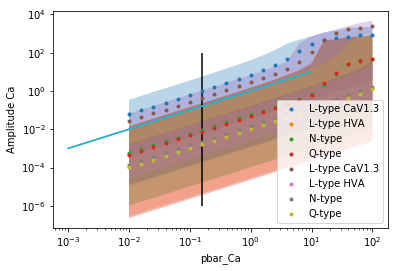

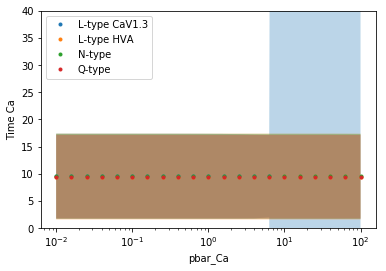

In [108]:
xt = phdiagLinE*1.0
calabels = ['L-type CaV1.3','L-type HVA','N-type','Q-type']
for i in range(4):
    plot(xt[xt[:,i]>0,i],xt[xt[:,i]>0,4],'.',label=calabels[i])
    fill_between(xt[xt[:,i]>0,i],xt[xt[:,i]>0,5],xt[xt[:,i]>0,6],alpha=0.3)
plot(10**linspace(-3,1),10**linspace(-3,1))

xt = phdiagLin*1.0
calabels = ['L-type CaV1.3','L-type HVA','N-type','Q-type']
for i in range(4):
    plot(xt[xt[:,i]>0,i],xt[xt[:,i]>0,4],'.',label=calabels[i])
    fill_between(xt[xt[:,i]>0,i],xt[xt[:,i]>0,5],xt[xt[:,i]>0,6],alpha=0.3)
plot(10**linspace(-3,1),10**linspace(-3,1))
#vlines(0.16,1e-6,1e2)
legend()
xscale('log')
yscale('log')
xlabel("pbar_Ca")
ylabel('Amplitude Ca')
figure()
calabels = ['L-type CaV1.3','L-type HVA','N-type','Q-type']
for i in range(4):
    plot(xt[xt[:,i]>0,i],xt[xt[:,i]>0,7],'.',label=calabels[i])
    fill_between(xt[xt[:,i]>0,i],xt[xt[:,i]>0,7]-xt[xt[:,i]>0,8],xt[xt[:,i]>0,7]+xt[xt[:,i]>0,8],alpha=0.3)
ylim(0,40)

legend()
xscale('log')

xlabel("pbar_Ca")
ylabel('Time Ca')

In [54]:
calabels

['L-type CaV1.3', 'L-type HVA', 'N-type', 'Q-type']

In [83]:
savetxt('VDCC_amplitudes_lineal_AP.dat',phdiagLin)
savetxt('VDCC_amplitudes_lineal_EPSP.dat',phdiagLinE)

In [129]:
w2p = {}
xt = phdiagLinE*1.0
def make_closure(xt,i):
    return lambda x: interp(x,xt[xt[:,i]>0,4],xt[xt[:,i]>0,i])
for i in range(4):
    w2p[calabels[i]+' EPSP'] = make_closure(xt,i)

#w2p[calabels[0]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,0]>0,4],phdiagLinE[phdiagLinE[:,0]>0,0])
#w2p[calabels[1]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,1]>0,4],phdiagLinE[phdiagLinE[:,1]>0,1])
#w2p[calabels[2]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,2]>0,4],phdiagLinE[phdiagLinE[:,2]>0,0])
#w2p[calabels[3]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,3]>0,4],phdiagLinE[phdiagLinE[:,3]>0,1])

xt = phdiagLin*1.0
for i in range(4):
    w2p[calabels[i]+' AP'] = make_closure(xt,i)
    
p2w = {}
xt = phdiagLinE*1.0
def make_closure(xt,i):
    return lambda x: interp(x,xt[xt[:,i]>0,i],xt[xt[:,i]>0,4])
for i in range(4):
    p2w[calabels[i]+' EPSP'] = make_closure(xt,i)

#w2p[calabels[0]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,0]>0,4],phdiagLinE[phdiagLinE[:,0]>0,0])
#w2p[calabels[1]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,1]>0,4],phdiagLinE[phdiagLinE[:,1]>0,1])
#w2p[calabels[2]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,2]>0,4],phdiagLinE[phdiagLinE[:,2]>0,0])
#w2p[calabels[3]+' EPSP'] = lambda x: interp(x,phdiagLinE[phdiagLinE[:,3]>0,4],phdiagLinE[phdiagLinE[:,3]>0,1])

xt = phdiagLin*1.0
for i in range(4):
    p2w[calabels[i]+' AP'] = make_closure(xt,i)

In [139]:
def vdccweights(c, label = 'EPSP'):
    vw = array([w2p[calabels[i]+' '+label](ci) for i,ci in enumerate(c)])
    return vw
def caamplin(w, label = 'EPSP'):
    c = array([p2w[calabels[i]+' '+label](wi) for i,wi in enumerate(w)])
    return c

In [140]:
print(calabels[0]+' EPSP')
i = 1
print([w2p[calabels[i]+' EPSP'](0.1) for i in range(4)])

print([p2w[calabels[i]+' EPSP'](0.1) for i in range(4)])

L-type CaV1.3 EPSP
[0.01654101478059008, 1.9743160585499924, 1.6830993498320028, 2.038916057313896]
[0.610983386061552, 0.0049227957510389565, 0.0058291477564557164, 0.004760519248834353]


In [86]:
At = 0.7
def produceweights(At = 0.7, n = 4):
    rw = rand(n)
    Atl = At
    for i in range(n-1):
        rwn = Atl*rw[i]
        Atl = Atl-rwn
        rw[i] = rwn
    rw[n-1] = Atl
    return(rw[permutation(n)])

rw = produceweights()
print(rw,rw.sum(), vdccweights(rw, label = 'EPSP'))

[0.07068224 0.38936484 0.23508951 0.0048634 ] 0.7000000000000001 [1.40850976 6.96813202 4.44778834 0.09879455]


In [132]:
rw = produceweights(At = 0.7)
vw =  vdccweights(rw, label = 'AP')
print(vw,caamplin(vw,label='EPSP').sum(),caamplin(vw,label='AP').sum())


[17.70546417 21.53666012  4.58998739 15.98290763] 13.179802749483292 0.7


In [141]:
nt = 10000
caamps = zeros((nt,2))
for i in range(nt):
    caA = 0.5+.5*rand()
    rw = produceweights(At = caA)
    vw =  vdccweights(rw, label = 'AP')
    #print(vw,caamplin(vw,label='EPSP').sum(),caamplin(vw,label='AP').sum())
    caE = caamplin(vw,label='EPSP').sum()
    caamps[i,:] = (caA,caE)
    

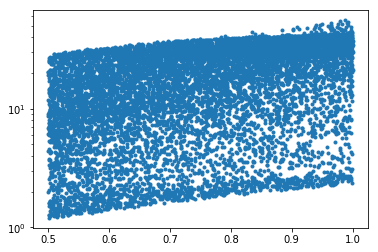

In [144]:
plot(caamps[:,0],caamps[:,1],'.')
yscale('log')

In [194]:
pars = [w2p*produceweights(At =0.75) for i in range(1500)]
print(pars[0])
phdiag = zeros((len(pars),9))
for i,par in enumerate(pars):
    vcomp = par
    output = simulateSetwAP(model,dis,y,t, \
                        VDCC = vcomp,tAP = 100,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiag[i,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    print(i)
    if i%50 == 0: savetxt("phdiagVDCC.dat",phdiag)

[0.00154318 0.51882219 0.28786435 0.1259627 ]


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in sqrt
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:137: RuntimeWarning: invalid value encountered in sqrt


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

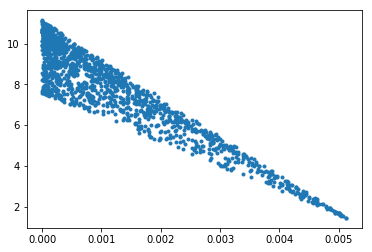

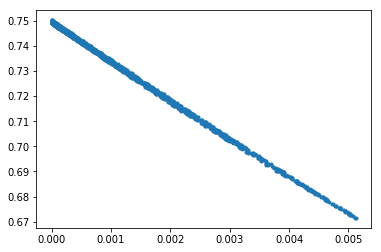

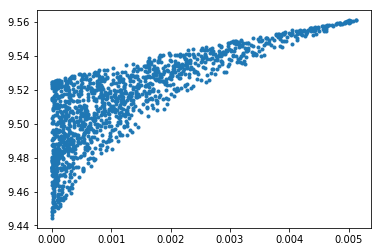

In [195]:
plot(phdiag[:,0],phdiag[:,5]-phdiag[:,6],'.')
figure()
plot(phdiag[:,0],phdiag[:,4],'.')
figure()
plot(phdiag[:,0],phdiag[:,7],'.')

In [170]:
try:
    y.play_remove()
except:
    pass

In [193]:
pars = [w2p*produceweights(At =0.75) for i in range(1500)]
print(pars[0])
phdiagEPSP = zeros((len(pars),9))
for i,par in enumerate(pars):
    vcomp = par
    output = simulateSet(model,dis,y,t, \
                        VDCC = vcomp,tAP = 1000,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
    vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
    cmaxs = Ctracs0.max(axis=0)
    times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
    phdiagEPSP[i,:] = concatenate((vcomp,[cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]))
    print(i)
    if i%50 == 0: savetxt("phdiagVDCCEPSP.dat",phdiagEPSP)

[0.00105947 0.05147583 0.12061127 1.03797734]


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in sqrt
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: invalid value encountered in sqrt


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

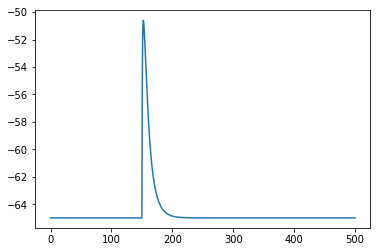

In [174]:
plot(trec,vtracs0[:,0])

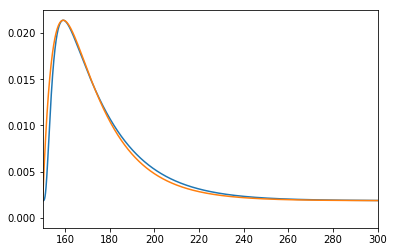

In [187]:
plot(trec,Ctracs0[:,0])
xlim(150,300)
times = transientTimes(Ctracs0,tlim= (140,300),ton=150)
biex = exp(-(trec)/times[0,0])-exp(-(trec)/times[0,1])
plot(trec+150,biex/max(biex)*(max(Ctracs0[:,0])-Ctracs0[-1,0])+Ctracs0[-1,0])

(array([ 9.,  0.,  3., 12.,  9., 12., 17., 24.,  8.,  7.,  8.,  6., 11.,
        21., 15., 11., 10., 11., 10., 11., 14., 27., 17., 21., 23.,  9.,
        16., 10., 17., 10., 19.,  9., 15.,  6.,  9.,  5.,  5.,  5.,  3.,
         5.,  4.,  5.,  4.,  6.,  3.,  3.,  5.,  4.,  2.,  2.,  2.]),
 array([-2.5895872 , -2.49848278, -2.40737835, -2.31627393, -2.22516951,
        -2.13406508, -2.04296066, -1.95185624, -1.86075181, -1.76964739,
        -1.67854297, -1.58743854, -1.49633412, -1.4052297 , -1.31412527,
        -1.22302085, -1.13191643, -1.04081201, -0.94970758, -0.85860316,
        -0.76749874, -0.67639431, -0.58528989, -0.49418547, -0.40308104,
        -0.31197662, -0.2208722 , -0.12976777, -0.03866335,  0.05244107,
         0.1435455 ,  0.23464992,  0.32575434,  0.41685876,  0.50796319,
         0.59906761,  0.69017203,  0.78127646,  0.87238088,  0.9634853 ,
         1.05458973,  1.14569415,  1.23679857,  1.327903  ,  1.41900742,
         1.51011184,  1.60121627,  1.69232069,  1.7834

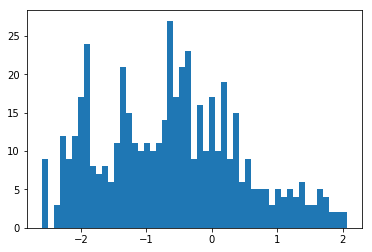

In [192]:
hist(log10(Ctracs0.max(axis=0)),51)

In [205]:
y.play_remove()

1.0

In [206]:
pars = [w2p*produceweights(At =0.75) for i in range(1500)]
print(pars[0])
vcomp = w2p*array([0.75,0,0,0])
output = simulateSet(model,dis,y,t, \
                    VDCC = vcomp,tAP = 1000,tG = 1000,ton = 50,toffset = 100,t_stop = 500, EL = -65,btsr = ones(9)==1)
vavg0,mes0,vtracs0,vtracsD0,vtracsS0,Ctracs0,me20,me30, trec = output
cmaxs = Ctracs0.max(axis=0)
times = transientTimes(Ctracs0,tlim= (90,200),ton=100)
res = [cmaxs.mean(),cmaxs.max(),cmaxs.min(),times.mean(),times.std()]


[0.00285987 0.51441077 0.01812243 0.1074625 ]


/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in sqrt
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/ipykernel_launcher.py:131: RuntimeWarning: invalid value encountered in sqrt


0.03149107355227114


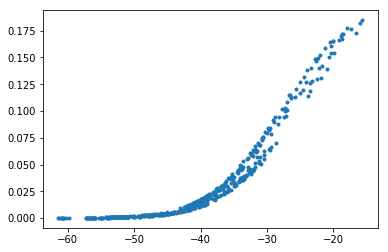

In [210]:
plot(vtracs0.max(axis=0),Ctracs0.max(axis=0)*.02,'.')
print(Ctracs0.max(axis=0).mean()*0.02)

In [199]:
arange(500)[Ctracs0.max(axis=0)>6]

array([244, 415])

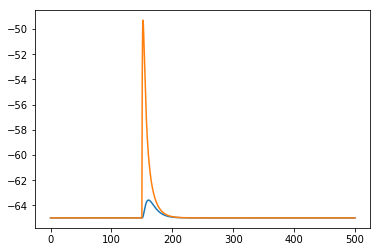

In [207]:
plot(trec,vtracsS0[:,0])
plot(trec,vtracs0[:,randint(500)])